## Ανδρέας Βεζάκης ΑΜ: 03117186
## Σταύρος Κινικλής ΑΜ: 03117608


# 1. Θεωρητικό μέρος:
<b> α) Ποιο είναι το πρόβλημα  και ποιες είναι οι κύριες ιδέες που διαπραγματεύεται το άρθρο αυτό; </b> 

Το πρόβλημα που διαπραγματεύεται το άρθρο, είναι η συμπίεση και ανάλυσης εικόνας καθώς τα γειτονικά πίξελς εμφανίζουν υψηλή συσχέτιση μεταξύ τους. Η κύρια ιδέα είναι χρήση της Γκαουσιανής και Λαπλασιανής Πυραμίδας (Gaussian, Laplacian Pyramid), για την επίλυση του παραπάνω προβλήματος.  
<b> β) Ποιος είναι οσκοπός του φίλτρου Gauss στην κατασκευή της πυραμίδας;Τι θα συνέβαινε αν χρησιμοποιήθηκε μόνο υποδειγματοληψία;</b> 

Όπως περιγράψαμε στο παραπάνω ερώτημα τα γειτονικά πίξελς παρουσιάζουν υψηλή συσχέτιση μεταξύ τους, το οποίο μεταφράζεται σε περιττή πληροφορία στην κωδικοποίησή τους. Επομένως, σκοπός του φίλτρου Gauss είναι η αφαίρεση της περιττής αυτής πληροφορίας. Οι συναρτήσεις μας οι οποίες χρησιμοποιούν το συγκεκριμένο φίλτρο, μειώνουν τις συχνότητες και κάνει down sampling 1/2 σε κάθε επίπεδο. Δηλαδή, το επίπεδο $g_{i+1}$ υπολογίζεται από το $g_{i}$ συνδυάζοντας με κατάλληλα βάρη τις τιμές των γειτονικών πίξελσ και είναι το μισό σε μέγεθος.

Δεν χρησιμοποιούμε μόνο υποδειγματοληψία για να αποφύγουμε το φαινόμενο aliasing

<b> γ) Πώς χρησιμοποιείται η πυραμίδα Laplacian για την επίλυση του προβλήματος που αναφέρεται στο άρθρο; Γιατί αυτή η αναπαράσταση εικόνας είναι καλύτερη από την πυραμίδα Gauss στο πλαίσιο της εργασίας που διαπραγματεύεται το άρθρο;</b> 

Στην Λαπλασιανή πυραμίδα κάθε επίπεδο είναι το σφάλμα $L_{i}$ to οποίο προκύπτει από την διαφορά του προηγούμενου και αντίστοιχου επιπέδου της Γκαουσιανής πυραμίδας. Όμως, επειδή το κάθε επίπεδο διαφέρει σε μέγεθος, εφαρμόζουμε την συνάρτηση GEXPAND, δηλάδή την αντίστροφη διαδικασία της GREDUCE.

Η αναπαράσταση της εικόνας μέσω της Λαπλασιανής πυραμίδας είναι καλύτερη από τη χρήση μόνο της Γκαουσιανής, καθώς τα πίξελς είναι ασυσχέτιστα μεταξύ τους και εφαρμόζοντας κβαντισμό στις εικόνες έχουμε περισσότερη συμπίεση (οι τιμές των πίξελς περιορίζονται σε συγκεκριμένα bits).

<b> δ) Περιγράψτε πώς να ανακτήσετε την εικόνα χρησιμοποιώντας μόνο την πυραμίδα Laplacian. Διατυπώστε την απάντησή σας χρησιμοποιώντας μια εξίσωση που περιγράφει αυτήν τη διαδικασία. Θα μπορέσουμε να ανακτήσουμε τέλεια την αρχική εικόνα; </b> 

Για την ανάκτηση της εικόνας ακολουθούμε τις παρακάτω εξισώσεις:
<center> $g_{N}$ = $L_{N}$

$g_{i}$ = $L_{i} + EXPAND(g_{i-1})$, l=N-1,N-1,...,0

Όπου η EXPAND όπως περιγράψαμε παραπάνω είναι η υπερδειγματοληψία της εικόνας κατα 2.
<center/>
Η ανακτόμενη εικόνα, πολλές φορές φαίνεται ίδια με την αρχική στο ανθρώπινο ματί. Βέβαια, μερικές φορές ο κβαντισμός οδηγεί σε απώλειες δεδομένων με αποτέλεσμα να μην μπορούμε να την ανακτήσουμε τέλεια.

# 2. Εργαστηριακό Μέρος:
## Α. Υλοποίηση Αλγορίθμου:

In [ ]:
import numpy as np
import cv2
import urllib.request
from matplotlib import pyplot as plt
from skimage import data
import scipy.stats as st

<b>α)

In [ ]:
def GKernel(a): #[c b a b c] * [c b a b c]^Τ
  return np.array([[1/4 - a/2],[1/4],[a],[1/4],[1/4 - a/2]]) @ np.array([[1/4 - a/2],[1/4],[a],[1/4],[1/4 - a/2]]).T

In [ ]:
h = GKernel(2)
print(h)

[[ 0.5625 -0.1875 -1.5    -0.1875  0.5625]
 [-0.1875  0.0625  0.5     0.0625 -0.1875]
 [-1.5     0.5     4.      0.5    -1.5   ]
 [-0.1875  0.0625  0.5     0.0625 -0.1875]
 [ 0.5625 -0.1875 -1.5    -0.1875  0.5625]]


<b> β)

In [ ]:
def GREDUCE(I,h):
  return cv2.filter2D(I,-1,h)[::2,::2]

<b> γ)

In [ ]:
def GPyramid(I,a,depth):
  h = GKernel(a)
  GausPyr = [I]
  for i in range(depth):
    I = GREDUCE(I,h)
    GausPyr.append(I)
  return GausPyr

In [ ]:
HTTP_response = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
tmp = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
tmp_gray = cv2.cvtColor(tmp, cv2.COLOR_RGB2GRAY)

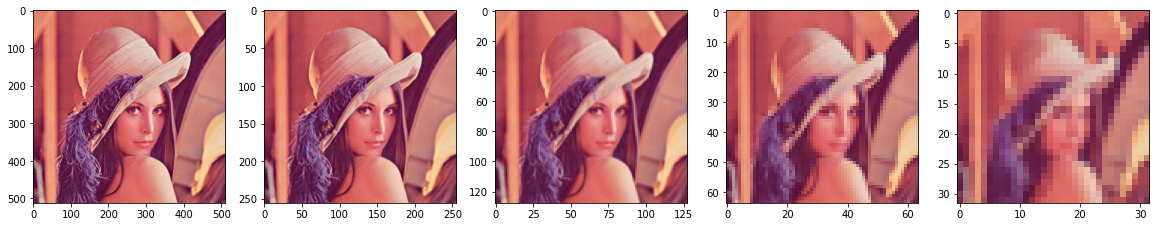

In [ ]:
L = GPyramid(tmp,0.5,5)
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(L[0], cmap="gray")
ax1.imshow(L[1], cmap="gray")
ax2.imshow(L[2], cmap="gray")
ax3.imshow(L[3], cmap="gray")
ax4.imshow(L[4], cmap="gray")
plt.show()

<b> δ)

In [ ]:
def GEXPAND(I,h):
  if (len(I.shape)==3): #Check if RGB or BGR
    G = np.zeros((I.shape[0]*2,I.shape[1]*2,I.shape[2]))
  else: #Check if Gray Scale
    G = np.zeros((I.shape[0]*2,I.shape[1]*2))
  G[::2,::2] = I
  G = 4 * cv2.filter2D(G,-1,h)
  return G

<b> ε)

In [ ]:
def LPyramid(I,a, depth):
    LaplPyr = []
    h = GKernel(a)
    G = GPyramid(I, a, depth)
    for i in range(depth-1):
        expand = GEXPAND(G[i+1], h)
        LaplPyr.append(G[i]-expand)
    LaplPyr.append(G[depth-1]) #Σε περιπτώση που δεν συμπεριλάβουμε την συγκεκριμένη γραμμή στον κώδικα μας, η εικόνα δεν ανακτάτε τέλεια.
    return LaplPyr

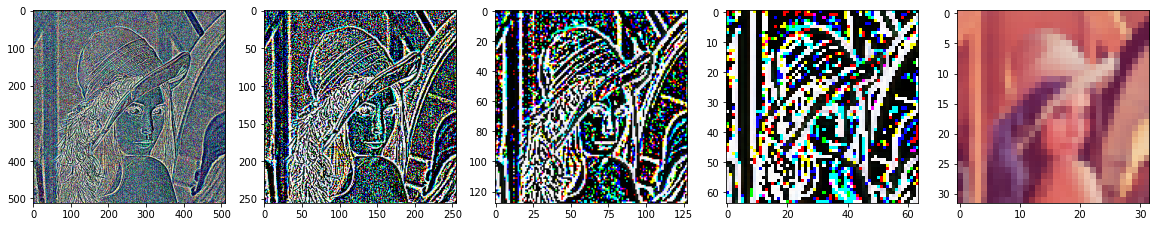

In [ ]:
L = LPyramid(tmp,0.5,5)
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(L[0]), cmap="gray")
ax1.imshow(np.uint8(L[1]), cmap="gray")
ax2.imshow(np.uint8(L[2]), cmap="gray")
ax3.imshow(np.uint8(L[3]), cmap="gray")
ax4.imshow(np.uint8(L[4]), cmap="gray")
plt.show()

<b> στ)

In [ ]:
def L_Pyramid_Decode(L,a):
  I = L[-1]
  h = GKernel(a)
  for i in range(len(L)-1): # 3 2 1 0 -1
    I = GEXPAND(I, h) + L[len(L)-2-i]
  return I

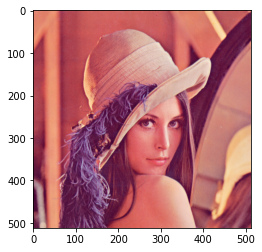

In [ ]:
I1 = L_Pyramid_Decode(L,0.5)
plt.imshow(np.uint8(I1), cmap="gray")
plt.show()

Παρατηρούμε ότι όσο αυξάνουμε το a, παρουσιάζονται artifacts, και δεν ανακτάμε τέλεια την αρχική εικόνα.

<b> ε)

In [ ]:
def L_Quantization(I,m,n,a,depth,index=0):
  if index == 0:   #Quantizing each level of the Laplacian Pyramid
    L = LPyramid(I,a,depth)
  else:           #Quantizing the original image
    L = [I]
  final = []
  
  for Li in L:
    if (len(Li.shape) == 3): #If RGB 
      Li = cv2.cvtColor((Li).astype(np.uint8), cv2.COLOR_RGB2GRAY) 
    else:                     #If Gray Scale
      Li = Li.astype(np.uint8)                                     
    C = ((Li > (m-1/2)*n) & (Li > (m+1/2)*n)).astype(np.uint8) #Find all element where the condition is true
    C = C*(m*n)                                                 #All elements where the condition was false will remain 0, and all other will equal to 1*m*n
    final.append(C)
  return final

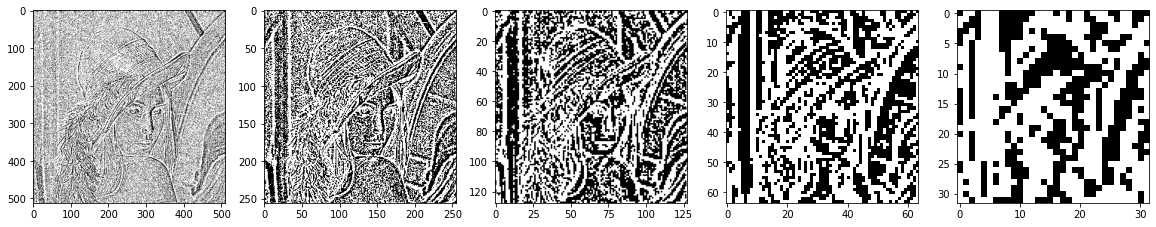

In [ ]:
C = L_Quantization(tmp,5,5,0.5,6)
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(C[0]), cmap="gray")
ax1.imshow(np.uint8(C[1]), cmap="gray")
ax2.imshow(np.uint8(C[2]), cmap="gray")
ax3.imshow(np.uint8(C[3]), cmap="gray")
ax4.imshow(np.uint8(C[4]), cmap="gray")
plt.show()

## Β. Δοκιμές αλγορίθμου

<b> α)

In [ ]:
HTTP_response = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
tmp = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
tmp_gray = cv2.cvtColor(tmp, cv2.COLOR_RGB2GRAY)

(512, 512)


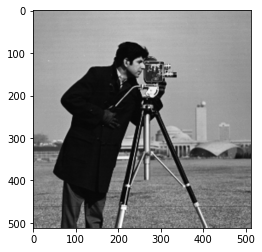

In [ ]:
from skimage import data
camera = data.camera()
print(camera.shape)
plt.imshow(camera, cmap="gray")
plt.show()

*  Εφαρμογή των "LPyramid" και "L_Pyramid_Decode" στην "lena" σε RGB

Text(0.5, 1.0, 'L[4]')

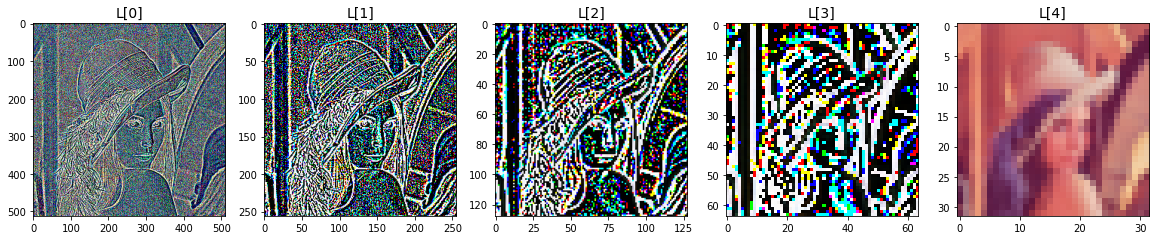

In [ ]:
L = LPyramid(tmp,0.5,5)
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(L[0]), cmap="gray")
ax0.set_title('L[0]', fontsize=14)
ax1.imshow(np.uint8(L[1]), cmap="gray")
ax1.set_title('L[1]', fontsize=14)
ax2.imshow(np.uint8(L[2]), cmap="gray")
ax2.set_title('L[2]', fontsize=14)
ax3.imshow(np.uint8(L[3]), cmap="gray")
ax3.set_title('L[3]', fontsize=14)
ax4.imshow(np.uint8(L[4]), cmap="gray")
ax4.set_title('L[4]', fontsize=14)

Σε περίπτωση που δεν εφαρμόζαμε την εξίσωση $L_{N}=G_{N}$ τότε η L[4] δεν θα ήταν ίδια με της Γκαουσιανής πυραμίδας και δεν θα ανακτούσαμε τέλεια την αρχική εικόνα. 

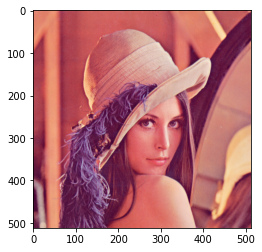

In [ ]:
I1 = L_Pyramid_Decode(L,0.5)
plt.imshow(np.uint8(I1), cmap="gray")
plt.show()

* Εφαρμογή των "LPyramid" και "L_Pyramid_Decode" στην "lena" σε Gray Scale 

Text(0.5, 1.0, 'L[4]')

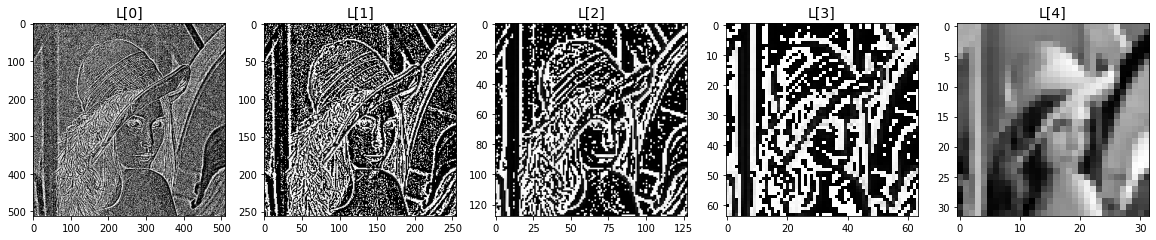

In [ ]:
L = LPyramid(tmp_gray,0.5,5)
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(L[0]), cmap="gray")
ax0.set_title('L[0]', fontsize=14)
ax1.imshow(np.uint8(L[1]), cmap="gray")
ax1.set_title('L[1]', fontsize=14)
ax2.imshow(np.uint8(L[2]), cmap="gray")
ax2.set_title('L[2]', fontsize=14)
ax3.imshow(np.uint8(L[3]), cmap="gray")
ax3.set_title('L[3]', fontsize=14)
ax4.imshow(np.uint8(L[4]), cmap="gray")
ax4.set_title('L[4]', fontsize=14)

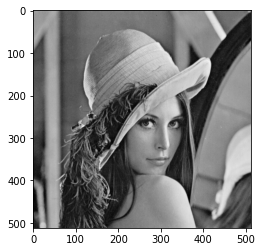

In [ ]:
I1 = L_Pyramid_Decode(L,0.5)
plt.imshow(np.uint8(I1), cmap="gray")
plt.show()

* Εφαρμογή των "LPyramid" και "L_Pyramid_Decode" στην "Camera" σε Gray Scale 

Text(0.5, 1.0, 'L[4]')

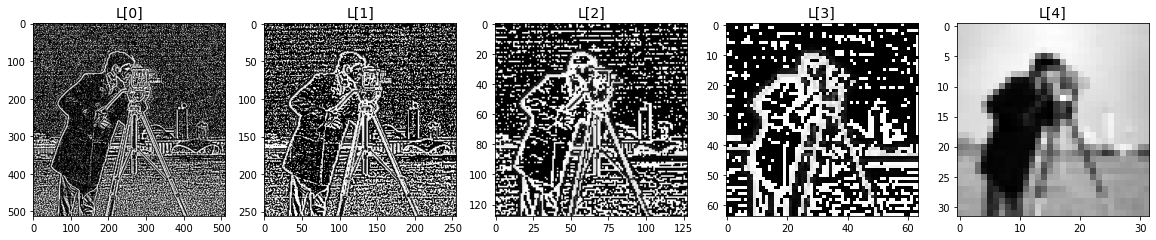

In [ ]:
L = LPyramid(camera,0.5,5)
f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(L[0]), cmap="gray")
ax0.set_title('L[0]', fontsize=14)
ax1.imshow(np.uint8(L[1]), cmap="gray")
ax1.set_title('L[1]', fontsize=14)
ax2.imshow(np.uint8(L[2]), cmap="gray")
ax2.set_title('L[2]', fontsize=14)
ax3.imshow(np.uint8(L[3]), cmap="gray")
ax3.set_title('L[3]', fontsize=14)
ax4.imshow(np.uint8(L[4]), cmap="gray")
ax4.set_title('L[4]', fontsize=14)

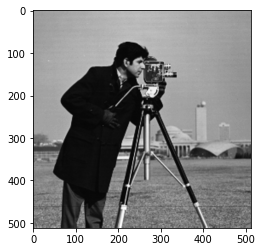

In [ ]:
I = L_Pyramid_Decode(L,0.5)
plt.imshow(I, cmap="gray")
plt.show()

<b> β)

In [ ]:
def decode(I,a,depth):
  L = LPyramid(I,a,depth)
  decoded_I = L_Pyramid_Decode(L,a)
  return decoded_I

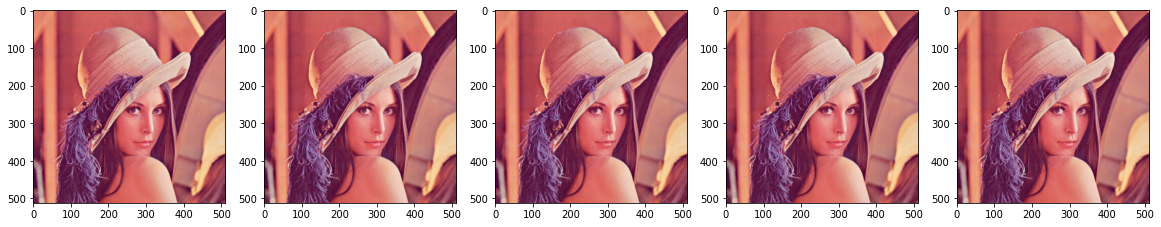

In [ ]:
L1 = []
for i in range(6):
  L1.append(decode(tmp,0.1*i+0.2,5))

f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(L1[0]), cmap="gray")
ax1.imshow(np.uint8(L1[1]), cmap="gray")
ax2.imshow(np.uint8(L1[2]), cmap="gray")
ax3.imshow(np.uint8(L1[3]), cmap="gray")
ax4.imshow(np.uint8(L1[4]), cmap="gray")
plt.show()

Παρατηρούμε ότι για όλες τις τιμές του α έχουμε το ίδιο αποτέλεσμα και δεν φαίνονται διαφορές από την αρχική εικόνα. Αν δεν είχαμε υλοποιήσει το  $L_{N}=G_{N}$ τότε η ανακτόμενη εικόνα θα είχε απλά διαφορές στα χρώματα σε σχέση την αρχική.

<b> γ)

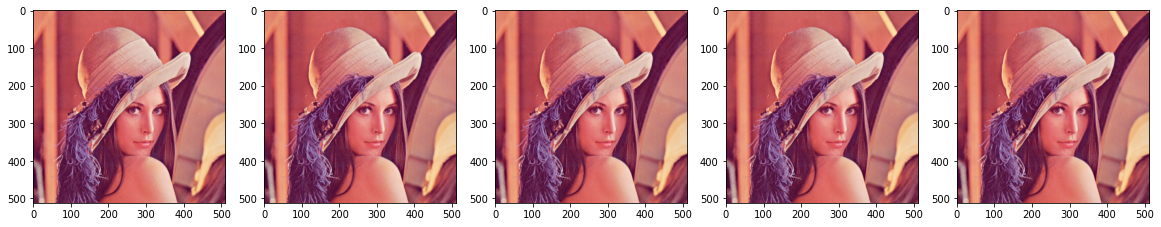

In [ ]:
L = []
for i in range(5):
  L.append(decode(tmp,0.5,i+2))

f, (ax0, ax1, ax2, ax3,ax4) = plt.subplots(1, 5, figsize=(20, 20))

ax0.imshow(np.uint8(L[0]), cmap="gray")
ax1.imshow(np.uint8(L[1]), cmap="gray")
ax2.imshow(np.uint8(L[2]), cmap="gray")
ax3.imshow(np.uint8(L[3]), cmap="gray")
ax4.imshow(np.uint8(L[4]), cmap="gray")
plt.show()

Οι ανακτόμενες εικόνες και πάλι είναι ίδιες με την αρχική.

<b> δ)

In [ ]:
def entropy(I,a,depth):
  entropy = []
  L = LPyramid(I,a,depth)
  sum_hist = np.zeros([256,1], np.float64)

  for n in range(depth-1):
    hist = cv2.calcHist([np.float32(L[n])], [0], None, [256], [0, 256])
    sum_hist += hist

  return st.entropy(sum_hist)[0]

* Η εντροπία για την εικόνα "lena" για διαφορετικές τιμές του a = [0.2,0.3,...,0.7]

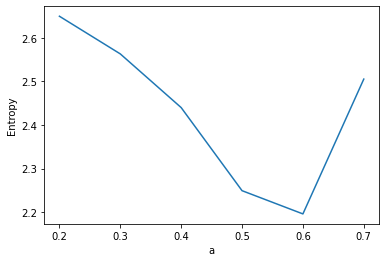

In [ ]:
L = []
x = np.linspace(0.2,0.7,6)
for i in range(6):
  L.append(entropy(tmp_gray,0.1*i+0.2,6))

plt.plot(x,L)
plt.xlabel('a')
plt.ylabel('Entropy')
plt.show()

* Η εντροπία για την εικόνα "lena" για διαφορετικές τιμές του depth= [2,3,...,7]

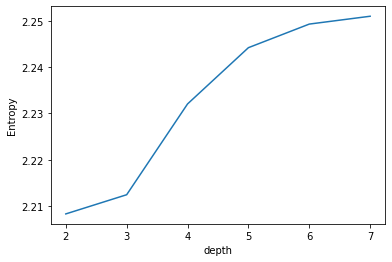

In [ ]:
L = []
x = np.linspace(2,7,6)
for i in range(6):
  L.append(entropy(tmp_gray,0.5,i+2))

plt.plot(x,L)
plt.xlabel('depth')
plt.ylabel('Entropy')
plt.show()

* Η εντροπία για την εικόνα "Camera" για διαφορετικές τιμές του a = [0.2,0.3,...,0.7]

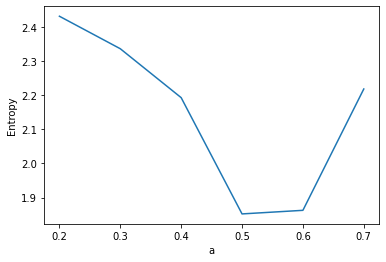

In [ ]:
L = []
x = np.linspace(0.2,0.7,6)
for i in range(6):
  L.append(entropy(camera,0.1*i+0.2,6))

plt.plot(x,L)
plt.xlabel('a')
plt.ylabel('Entropy')
plt.show()

* Η εντροπία για την εικόνα "camera" για διαφορετικές τιμές του depth= [2,3,...,7]

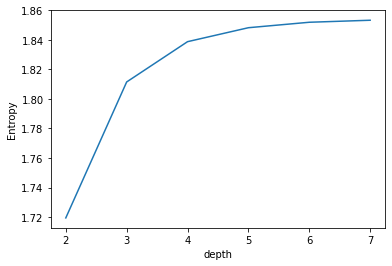

In [ ]:
L = []
x = np.linspace(2,7,6)
for i in range(6):
  L.append(entropy(camera,0.5,i+2))

plt.plot(x,L)
plt.xlabel('depth')
plt.ylabel('Entropy')
plt.show()

<b> ε)

In [ ]:
L = []
x = np.linspace(0.2,0.7,6)
Var = []

for i in range(6):
  var = []
  L = LPyramid(tmp,0.1*i+0.2,6)

  for j in range(5):
    var.append(np.var(L[j]))

  Var.append(var)
Var = np.array(Var)
min = np.amin(Var,0)
#print(Var)
minIndex = [np.where(Var == min[0]), np.where(Var == min[1]), np.where(Var == min[2]), np.where(Var == min[3]), np.where(Var == min[4])] 
# Η np.where μας επιστρέφει 2 array που περιγράφουν τις θέσεις που επαληθεύεται η σχέση.
# Δλδ το πρώτο ελάχιστο στοιχείο ως προς τις στήλες βρίσκεται στη θέση (array0[0]=4,array1[0]=0), το 2ο στη (array2[0]=3,array3[0]=1) κτλ..
print(minIndex)

[(array([4]), array([0])), (array([3]), array([1])), (array([3]), array([2])), (array([3]), array([3])), (array([3]), array([4]))]


Για τα επίπεδα 1,2,3,4 η ελάχιστη variance εντοπίζεται στο a = 0.5 και για το 0 εντοπίζεται στο a = 0.6

In [ ]:
L = []
x = np.linspace(0.2,0.7,6)
Var = []

for i in range(6):
  var = []
  L = LPyramid(camera,0.1*i+0.2,6)

  for j in range(5):
    var.append(np.var(L[j]))

  Var.append(var)
Var = np.array(Var)
min = np.amin(Var,0)
minIndex = [np.where(Var == min[0]), np.where(Var == min[1]), np.where(Var == min[2]), np.where(Var == min[3]), np.where(Var == min[4])]
print(minIndex)

[(array([4]), array([0])), (array([3]), array([1])), (array([3]), array([2])), (array([3]), array([3])), (array([1]), array([4]))]


Για το επίπεδο 0 εντοπίζεται στο α = 0.6, για τα 1,2,3 στο α = 0.5, για το 4 στο α = 0.3 \\

Επομένως, παρατηρώντας και τα διαγράμματα εντροπίας του παραπάνω ερωτήματος, αντιλαμβανόμαστε ότι για a = 0.6, βρίσκουμε την μικρότερη τιμή εντροπίας και μικρότερη διακύμανση στο πρώτο επίπεδο και των δύο εικόνων. Συνεπώς, βέλτιστο a = 0.6

<b> στ) </b>

* Για την εικόνα "lena"



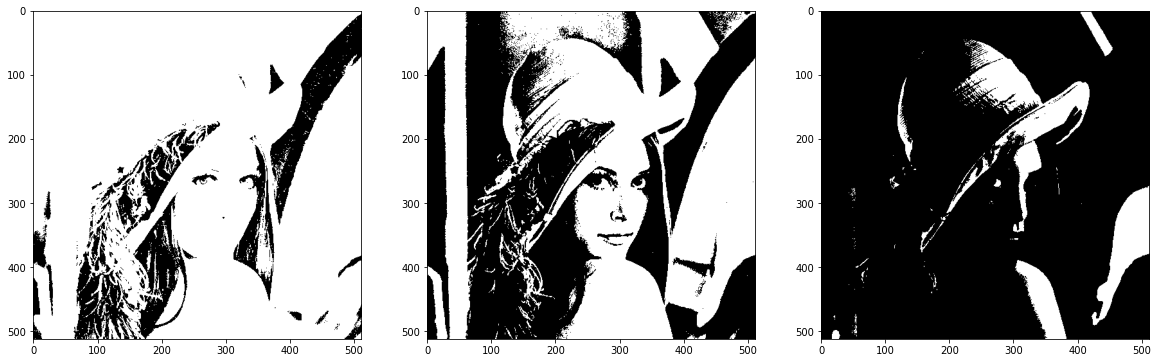

In [ ]:
L1 = L_Quantization(tmp,10,6,0.6,7,1)
L2 = L_Quantization(tmp,20,6,0.6,7,1)
L3 = L_Quantization(tmp,30,6,0.6,7,1)

f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 20))

ax0.imshow(L1[0], cmap="gray")
ax1.imshow(L2[0], cmap="gray")
ax2.imshow(L3[0], cmap="gray")
plt.show()

* Για την εικόνα "Camera"

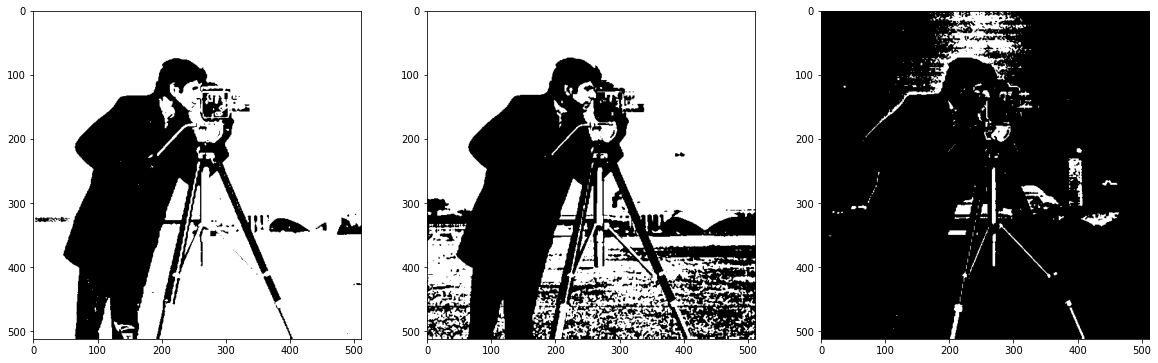

In [ ]:
C1 = L_Quantization(camera,10,6,0.6,7,1)
C2 = L_Quantization(camera,20,6,0.6,7,1)
C3 = L_Quantization(camera,30,6,0.6,7,1)
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(20, 20))

ax0.imshow(C1[0], cmap="gray")
ax1.imshow(C2[0], cmap="gray")
ax2.imshow(C3[0], cmap="gray")
plt.show()

<b> ζ)

In [ ]:
def signaltonoise(a, axis=0, ddof=0):  #Calculates Signal to Noise Ratio
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

* Για την εικόνα "lena"

In [ ]:
print("SNR of the original image =",signaltonoise(tmp,None))

SNR of the original image = 2.174032600498485


In [ ]:
print("SNR of the new images")
print(signaltonoise(L1[0],None))
print(signaltonoise(L2[0],None))
print(signaltonoise(L3[0],None))

SNR of the new images
2.2724509032319484
1.0936212655103688
0.3590730921382557


* Για την εικόνα "camera"

In [ ]:
print("SNR of the original image =",signaltonoise(camera,None))

SNR of the original image = 1.9084121528738205


In [ ]:
print("SNR of the new images")
print(signaltonoise(C1[0],None))
print(signaltonoise(C2[0],None))
print(signaltonoise(C3[0],None))

SNR of the new images
1.7674743681337728
1.2642244617440863
0.22977294180119245
